In [2]:
#importing libraries which are necessary
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [4]:
#Loading my dataset
data_path = "/loan_data.csv"
data = pd.read_csv(data_path)
#Printing the first 10 dataitems to display whether the dataset is correctly read
print(data.head(10))
#since there is no use of using Loan_Id in testing and training we just droped it
data = data.drop('Loan_ID', axis=1)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001013   Male     Yes          0  Not Graduate            No   
5  LP001024   Male     Yes          2      Graduate            No   
6  LP001027   Male     Yes          2      Graduate           NaN   
7  LP001029   Male      No          0      Graduate            No   
8  LP001030   Male     Yes          2      Graduate            No   
9  LP001032   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583         

In [5]:
#Exploring the dataset
rows,columns = data.shape
#Rows represent number of dataitems
print("Rows:",rows)
#Columns represent Number of Attributes or features
print("Columns:",columns)

Rows: 381
Columns: 12


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#Dataset Summary to identify trends and understanding the data
summary_stats = data.describe()
print(summary_stats)

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       381.000000         381.000000  381.000000        370.000000   
mean       3579.845144        1277.275381  104.986877        340.864865   
std        1419.813818        2340.818114   28.358464         68.549257   
min         150.000000           0.000000    9.000000         12.000000   
25%        2600.000000           0.000000   90.000000        360.000000   
50%        3333.000000         983.000000  110.000000        360.000000   
75%        4288.000000        2016.000000  127.000000        360.000000   
max        9703.000000       33837.000000  150.000000        480.000000   

       Credit_History  
count      351.000000  
mean         0.837607  
std          0.369338  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [8]:
#Since my data is not skwed so i think we do not need any transformations of attributes
#Data cleaning and Preprocessing
print(data.isnull().sum())
#replacing the missing values to 0
data.fillna(0, inplace=True)
print(data.isnull().sum())

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Loan_Status'] = label_encoder.fit_transform(data['Loan_Status'])
data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,1
6,Male,Yes,2,Graduate,0,2500,1840.0,109.0,360.0,1.0,Urban,1
7,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,0
8,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,1
9,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,1


In [10]:
#Categorical Features analysis
def encoder(dataframe):
    dataframe['Gender'] = np.where(dataframe['Gender']=='Male', 0, 1)
    dataframe['Married'] = np.where(dataframe['Married']=='No', 0, 1)
    dataframe['Education'] = np.where(dataframe['Education']=='Not Graduate', 0, 1)
    dataframe['Self_Employed'] = np.where(dataframe['Self_Employed']=='No', 0, 1)
    dataframe = pd.get_dummies(dataframe, dtype='int64')
    return dataframe

In [11]:
df = encoder(data)
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,0,1,0,0,1,0,0
1,0,1,1,1,3000,0.0,66.0,360.0,1.0,1,0,1,0,0,0,0,0,1
2,0,1,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0,0,0,0,0,1
3,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,0,0,0,1
4,0,1,0,0,2333,1516.0,95.0,360.0,1.0,1,0,1,0,0,0,0,0,1


In [12]:
#Spliting the dataset into training set and testing set
from sklearn.model_selection import train_test_split
X = df.drop('Loan_Status', axis=1)
y = data['Loan_Status']
X.fillna(0, inplace=True)
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Here used 20% data for testing and rest for training

In [13]:
#Implimenting Logistic Regression
from sklearn.linear_model import LogisticRegression
# Initialize the logistic regression model
model = LogisticRegression()
# Train the model on the training data
model.fit(X_train,y_train)
# Predict the loan status for the testing data
y_pred = model.predict(X_test)

In [14]:
#Model Loss Evaluation(Errors)
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test, y_pred)
print("mean squared error:",mse)
print("R-Squared",r2)

mean squared error: 0.2597402597402597
R-Squared -0.30952380952380953


In [15]:
#model Performance for Logistic Regression
#caluculating Accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculating Precision
precision = precision_score(y_test, y_pred)
# Calculating Recall
recall = recall_score(y_test, y_pred)
# Calculating F1-score
f1 = f1_score(y_test, y_pred)
# Calculating ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC score:", roc_auc)

Accuracy: 0.7402597402597403
Precision: 0.7647058823529411
Recall: 0.9285714285714286
F1-score: 0.8387096774193549
ROC AUC score: 0.5833333333333334


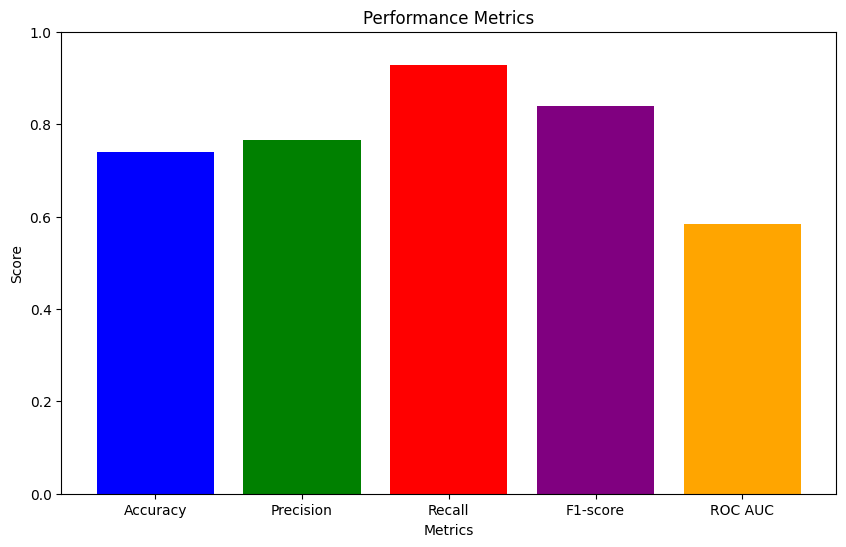

In [16]:
#stats visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']
values = [accuracy, precision, recall, f1, roc_auc]
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.ylim(0, 1)
plt.show()

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
#Implimenting SVM(support vector machine)
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
#Showing scores of SVM
cv_scores = cross_val_score(svm_model, X, y, cv=2,scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
#since we performed 2 cross validation there are 2 scores so we average them
print("Average Score:", cv_scores.mean())

Cross-Validation Scores: [0.71204188 0.71052632]
Average Score: 0.7112841003031138


In [23]:
#model Performance for SVM
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score",f1)

Accuracy: 0.7272727272727273
Precision: 0.7272727272727273
Recall: 1.0
F1-Score 0.8421052631578948


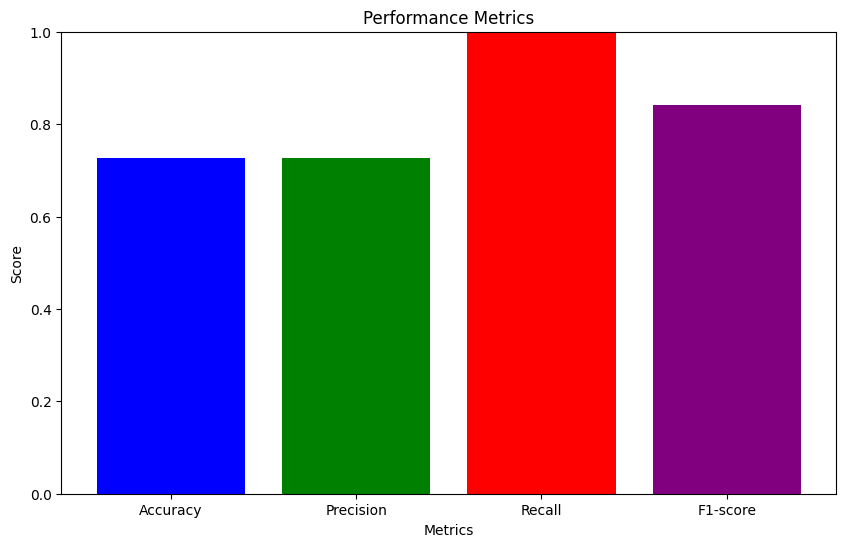

In [26]:
#stats visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.ylim(0, 1)
plt.show()